<a href="https://colab.research.google.com/github/Rutvikshah47/Breast-Cancer-Prediction/blob/master/Breast_Cancer_Prediction_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***`Breast Cancer Prediction`***

*INTRODUCTION*

In this BioInformatics project, I usually focus on feature visualization and selection , hybrid
approach of supervised and unsupervised learning on k-means and comparision of this with popular supervised learning on Breast Cancer data set to predict class of cancer 
benign and malignant.


In [0]:
# Code to read csv file into Colaboratory:

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 20.8MB/s 


In [0]:
import warnings
warnings.filterwarnings(action='once')

#import libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.spatial import distance
from scipy.spatial import distance_matrix
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import time
from subprocess import check_output

/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


**Data Importing**


In [0]:
#Get data set from Drive
downloaded = drive.CreateFile({'id': '1aDd32ZfPn-xRhy7vBsg1OqQSKgg3MP0j'}) 
downloaded.GetContentFile('BC_v1.csv')  
df_v1 = pd.read_csv('BC_v1.csv')

#To write csv in drive
'''
df_v16.to_csv('v16.csv', index=False)

upload = drive.CreateFile({'title': 'v16.csv'})
upload.SetContentFile('v16.csv')
upload.Upload()
'''
# Dataset is now stored in a Pandas Dataframe

"\ndf_v16.to_csv('v16.csv', index=False)\n\nupload = drive.CreateFile({'title': 'v16.csv'})\nupload.SetContentFile('v16.csv')\nupload.Upload()\n"

**Data Analysis**

Before making anything like feature selection,feature extraction and classification, firstly we start with basic data analysis. Lets look at features of data.

In [0]:
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

/usr/local/lib/python3.6/dist-packages/matplotlib/ticker.py:1912: ResourceWarning: unclosed <ssl.SSLSocket fd=61, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 43074), raddr=('74.125.199.95', 443)>
  self._min_n_ticks = max(1, kwargs['min_n_ticks'])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32ae04ecc0>,
      dtype=object)

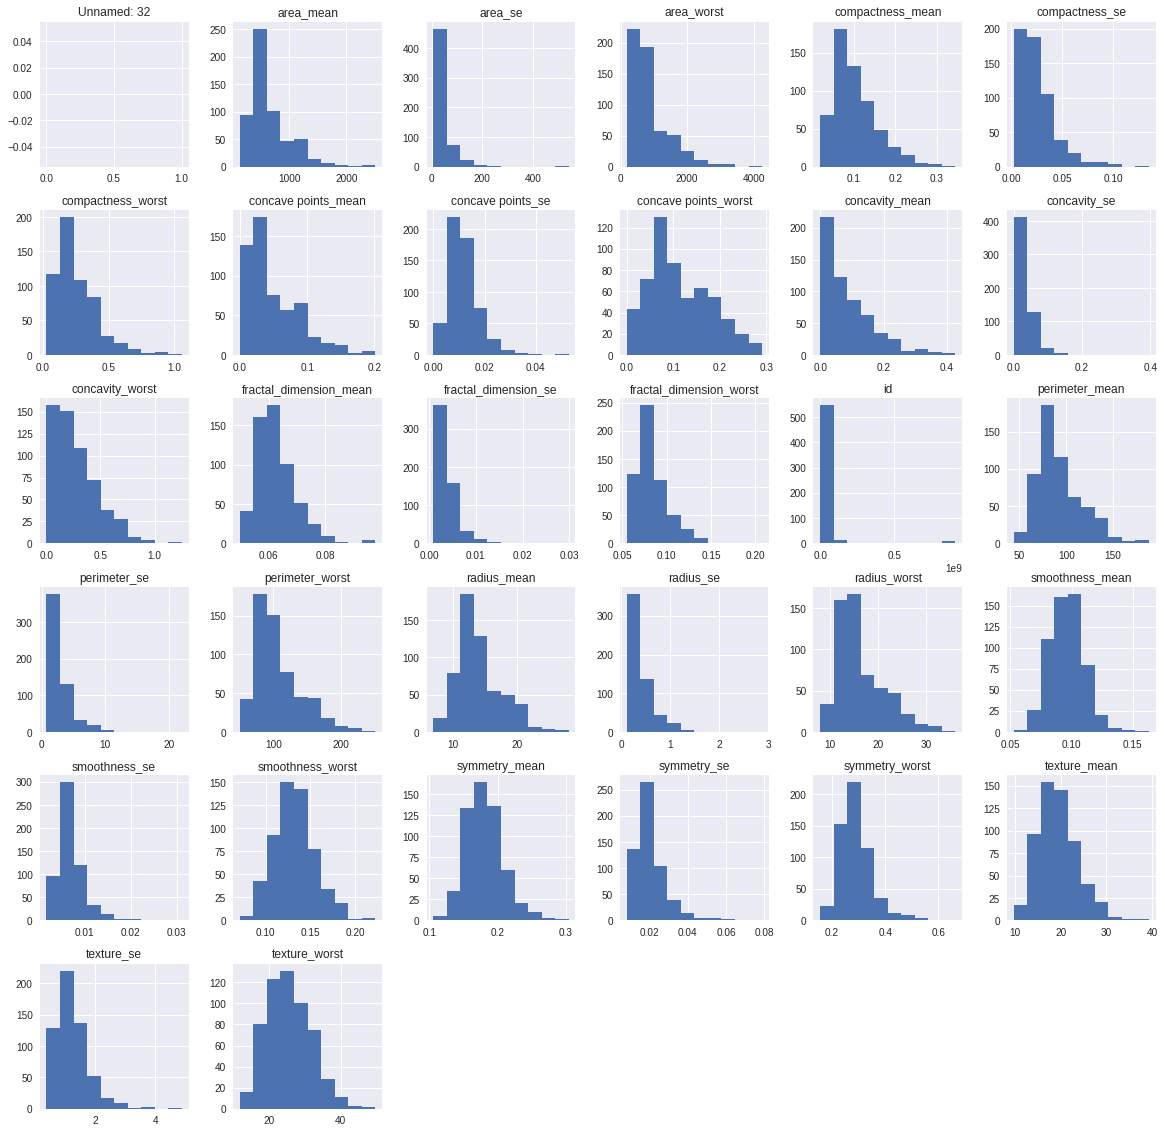

In [0]:
#Histogram of all attributes
df_v1.hist(figsize=(20,20))

In [0]:
#check null values
print(df_v1.isnull().sum())
print(df_v1.isna().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

There are 2 things that take my attention  1) Diagnosis is our class label 2) Unnamed: 32 feature includes NaN so we do not need it.

Therefore, drop these unnecessary features.



In [0]:
#Split target values
X=df_v1.drop(["Unnamed: 32","diagnosis"],axis=1)
Y=df_v1.diagnosis
X.head(2)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


B    357
M    212
Name: diagnosis, dtype: int64

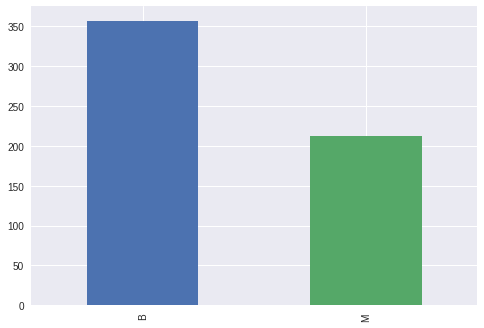

In [0]:

#lets count class labels
df_v1.diagnosis.value_counts().plot(kind='bar')
df_v1.diagnosis.value_counts()

Now I have features but what does they mean or actually how much do I need to know about these features There is a method describe() ,I should know something like variance, standart deviation, number of sample (count) or max min values. These type of information helps to understand about what is going on data. For example , the question is appeared in my mind the area_mean feature's max value is 2500 and smoothness_mean features' max 0.16340. Therefore do we need standirdization or normalization before visualization, feature selection, feature extraction or classificaiton.

In [0]:
X.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Data Visualization**

In order to visualizate data I am going to use seaborn plots . I used here violin plot and swarm plot. Here I am not selecting feature, I am trying to know features comparition.

In [0]:
#Split training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X[X.columns[1:31]], Y, test_size=0.3, random_state=42)

Before violin and swarm plot we need to normalization or standirdization. Because differences between values of features are very high to observe on plot

In [0]:
#Feature Scaling
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
#X_train.shape

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:637: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

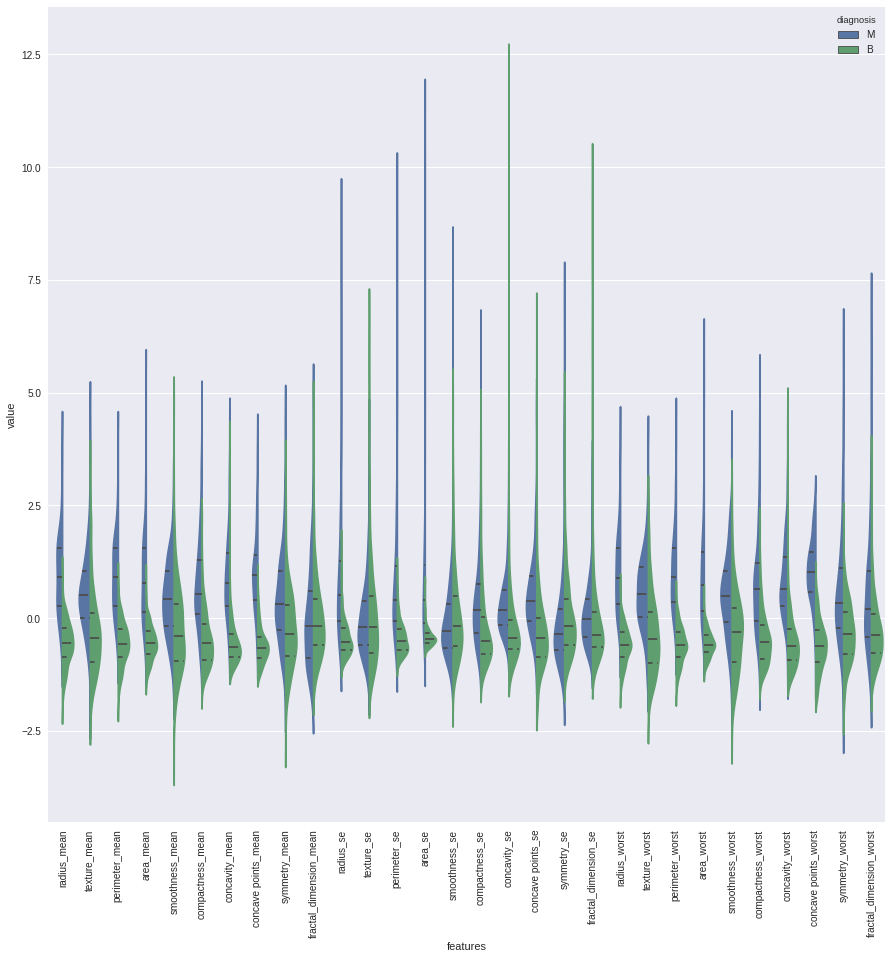

In [0]:
# violin plot
data_dia = Y
data = X[X.columns[1:31]]
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([Y,data_n_2],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,15))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

Lets interpret the plot . For example, in texture_mean feature, median of the Malignant and Benign looks like separated so it can be good for classification. However, in fractal_dimension_mean feature, median of the Malignant and Benign does not looks like separated so it does not gives good information for classification.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

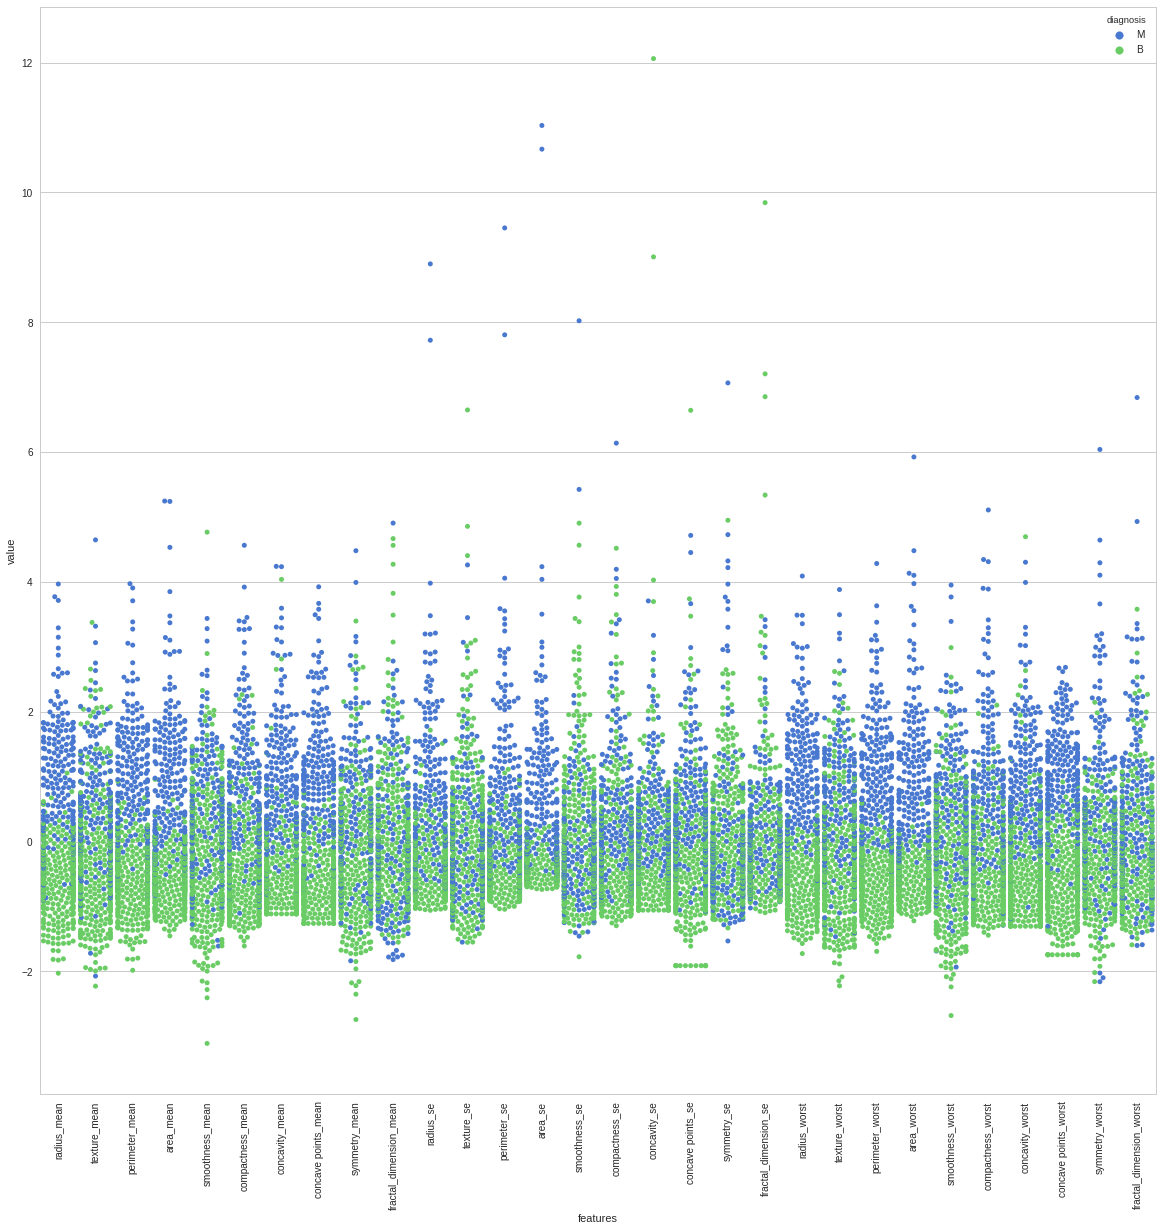

In [0]:
#swarm plot
sns.set(style="whitegrid", palette="muted")
data_dia = Y
data = X[X.columns[1:31]]
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([Y,data_n_2],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,20))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

I can see variance more clear. In my opinion area_worst in  swarm plot looks like malignant and benign are seprated not totally but mostly. However, smoothness_se in swarm plot looks like malignant and benign are mixed so it is hard to classfy while using this feature.

To observe all correlation between features I used heatmap that is old but powerful plot method.

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:


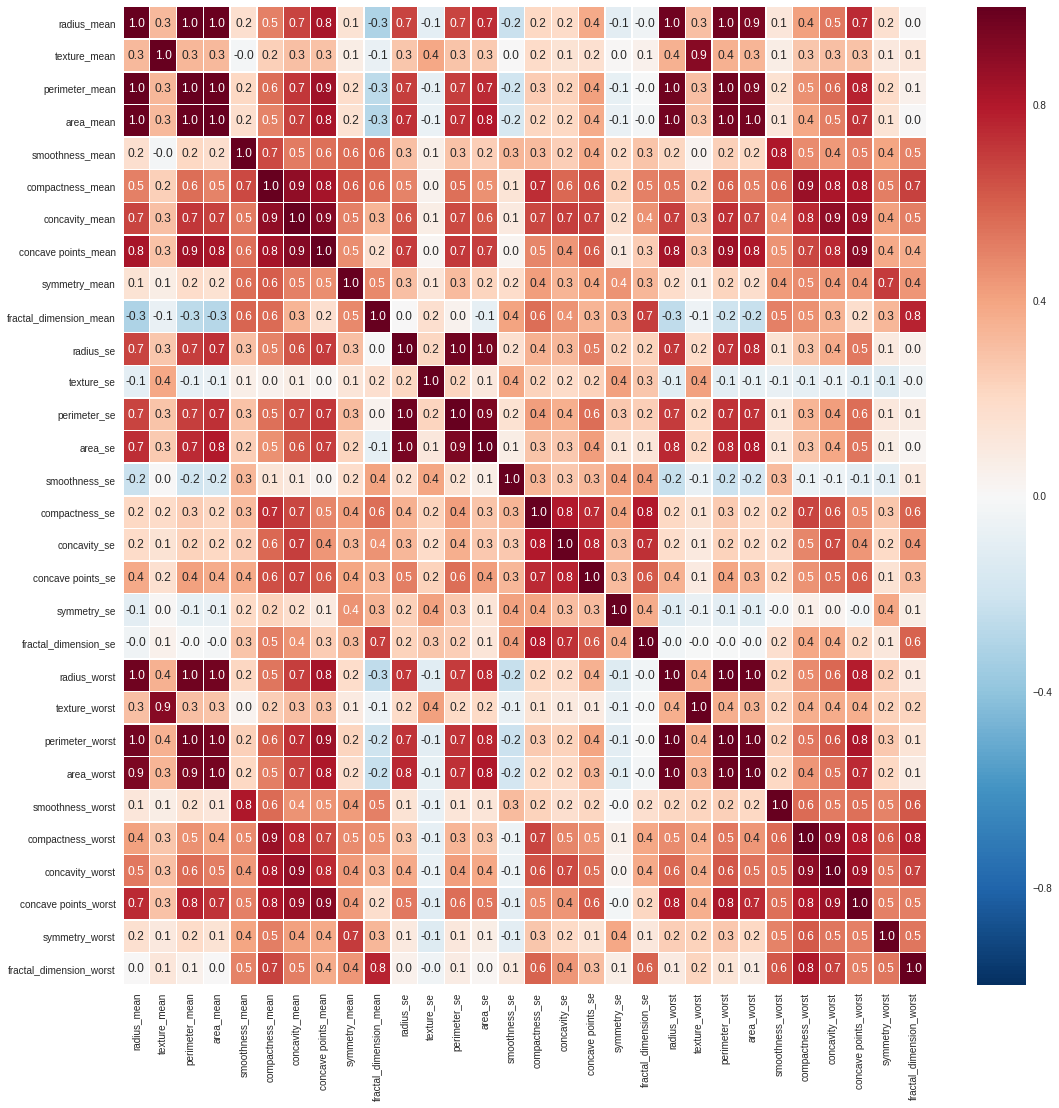

In [0]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X[X.columns[1:31]].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

**Features Selectioon**

In this part I will select feature with different methods that are feature selection with correlation, univariate feature selection, recursive feature elimination (RFE), recursive feature elimination with cross validation (RFECV).I will use random forest classification in order to train our model and predict.

1) Feature selection with correlation and random forest classification

Here I can see some of features are highly correlated , so I dropped this features.

In [0]:
drop_list1 = ['id','perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = X.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
x_1.shape

(569, 16)

Again see correlation between them.

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:


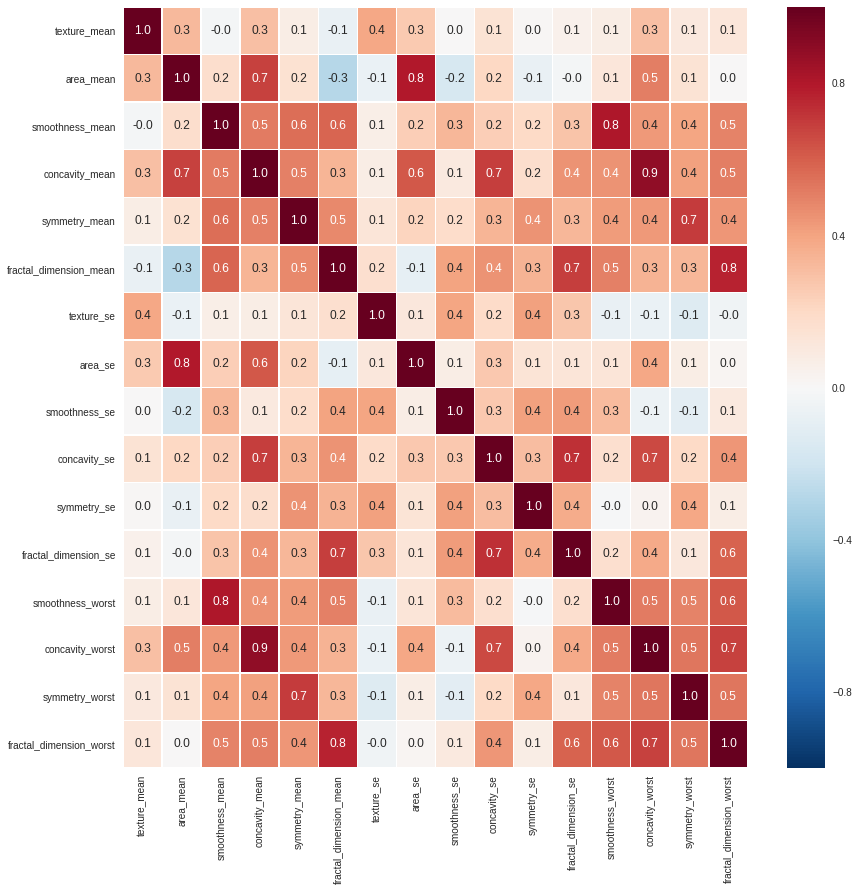

In [0]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Accuracy is:  0.9473684210526315


/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:


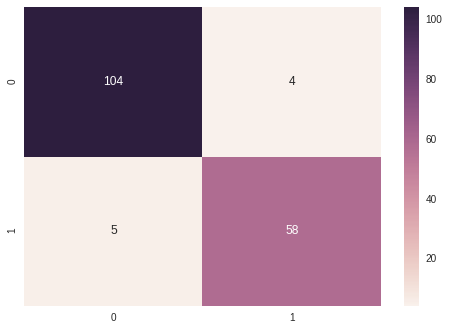

In [0]:
#without dropping correlated features
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X[X.columns[1:31]], Y, test_size=0.3, random_state=42)
acc=[]
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
acc.append(ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is:  0.9532163742690059


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:


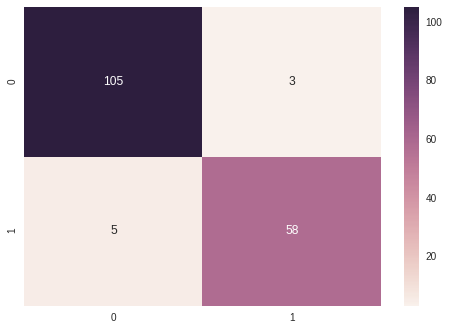

In [0]:
#with droping correlated features
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, Y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
acc.append(ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

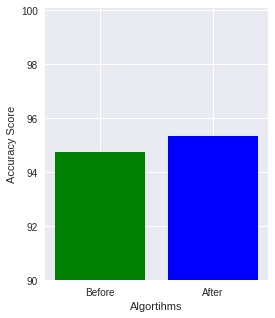

In [0]:
acc=[]
acc.append(94.73)
acc.append(95.32)
model=[]
model.append("Before")
model.append("After")
#lets plot the bar graph between supervised and unsupervised algos

plt.figure(figsize=(4,5))
plt.bar(model,acc,label='Accuracy',color=['g','b','orange','yellow','blue','purple','skyblue'])
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')
plt.gca().set_ylim(bottom=90)
#plt.margins(x=0.0001)


plt.show()

Now lets see other feature selection methods to find better results.

2) Univariate feature selection and random forest classification
    In univariate feature selection, I will use SelectKBest that removes all but the k highest scoring features.
    In this method I need to choose how many features I will use. I do not try all combinations but I only choose k = 5 and find best 5 features.



In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
x_train, x_test, y_train, y_test = train_test_split(X[X.columns[1:31]], Y, test_size=0.3, random_state=42)

select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [1.77946492e+02 6.06916433e+01 1.34061092e+03 3.66899557e+04
 1.00015175e-01 3.41839493e+00 1.30547650e+01 7.09766457e+00
 1.95982847e-01 3.42575072e-04 2.45882967e+01 4.07131026e-02
 1.72696840e+02 6.12741067e+03 1.32470372e-03 3.74071521e-01
 6.92896719e-01 2.01587194e-01 1.39557806e-03 2.65927071e-03
 3.25782599e+02 1.16958562e+02 2.40512835e+03 7.50217341e+04
 2.63226314e-01 1.19077581e+01 2.58858117e+01 8.90751003e+00
 1.00635138e+00 1.23087347e-01]
Feature list: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'c

I use only these best scored 5 feature.





Accuracy is:  0.9415204678362573


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:


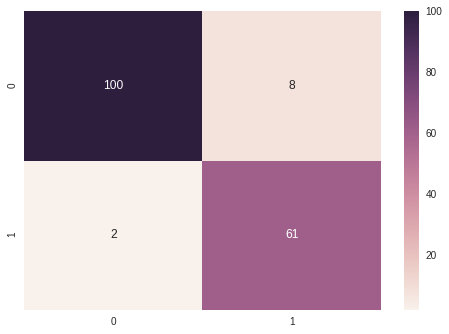

In [0]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)

#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

Now lets see other feature selection methods to find better results.

3) Recursive feature elimination (RFE) with random forest:
      Basically, it uses one of the classification methods (random forest in this example), assign weights to each of features. Whose absolute weights are the smallest are pruned from the current set features. That procedure is recursively repeated on the pruned set until the desired number of features

Like previous method,I will use 5 features. 

In [0]:
from sklearn.feature_selection import RFE
#pd.options.mode.sim_interactive=None
# Create the RFE object and rank each pixel
x_train, x_test, y_train, y_test = train_test_split(X[X.columns[1:31]], Y, test_size=0.3, random_state=42)

clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

In [0]:
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['area_se', 'perimeter_worst', 'area_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')


5 best features , they are exactly similar with previous (selectkBest) method. Therefore  do not need to calculate accuracy again. 

4) Recursive feature elimination with cross validation and random forest classification :
Now I will not only find best features but also find how many features do we need for best accuracy.

In [0]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
x_train, x_test, y_train, y_test = train_test_split(X[X.columns[1:31]], Y, test_size=0.3, random_state=42)

clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring="accuracy")   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

In [0]:

print('Optimal number of features :', rfecv.n_features_)

print('Best features :', x_train.columns[rfecv.support_])
x_train=x_train[x_train.columns[rfecv.support_]]
x_test=x_test[x_test.columns[rfecv.support_]]


Optimal number of features : 25
Best features : Index(['texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


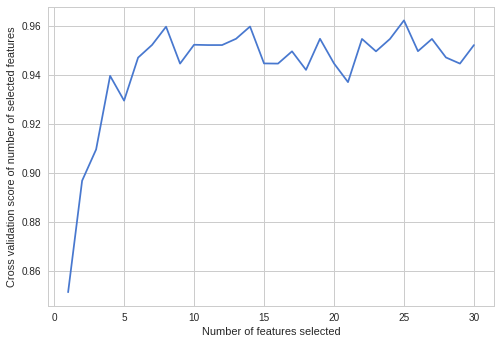

In [0]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [0]:
#Encoding categorical data values

labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [0]:
#x_train, x_test, y_train, y_test = train_test_split(X[X.columns[1:31]], Y, test_size=0.3, random_state=42)


In [0]:
#Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
#X_train.shape

Text(0, 0.5, 'explained_variance_ratio_')

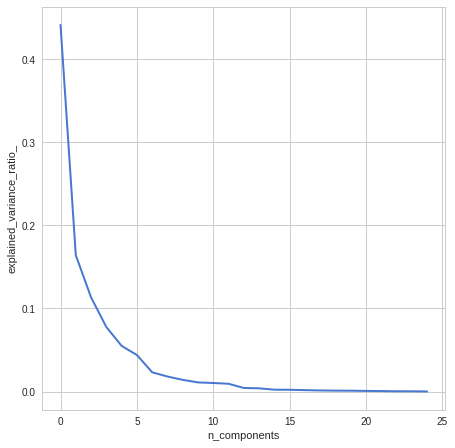

In [0]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train)

plt.figure(1, figsize=(8, 8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

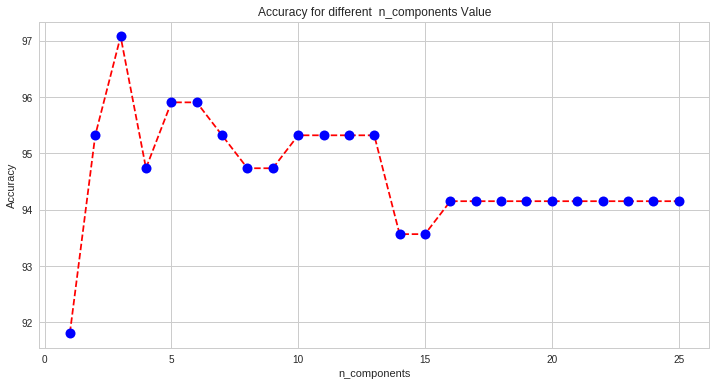

Max no of components to gain max accuracy: 3


In [0]:
maxi=0
ptemp=0
auc=[]
for i in range(1,rfecv.n_features_+1):
  
  from sklearn.decomposition import PCA
  pca = PCA(n_components=i)
  x_train_temp = pca.fit_transform(x_train)
  x_test_temp = pca.fit_transform(x_test)

  #from sklearn.linear_model import LogisticRegression
  #classifier = LogisticRegression(random_state = 0)
  #classifier.fit(x_train_temp, y_train)

  from sklearn.svm import SVC
  classifier = SVC(kernel = 'linear', random_state = 0)
  classifier.fit(x_train_temp, y_train)

    
  y_pred = classifier.predict(x_test_temp)

  cm = confusion_matrix(y_test, y_pred)
  temp= metrics.accuracy_score(y_test,y_pred)
  auc.append(temp*100)
  if(ptemp<temp):
    maxi=i
    ptemp=temp
  #print(temp)
plt.figure(figsize=(12, 6))  
plt.plot(range(1, rfecv.n_features_+1),auc, color='red', linestyle='dashed', marker='o',  
             markerfacecolor='blue', markersize=10)
plt.title('Accuracy for different  n_components Value')  
plt.xlabel('n_components')  
plt.ylabel('Accuracy') 
plt.show()
print("Max no of components to gain max accuracy:",maxi)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=maxi)
x_train = pca.fit_transform(x_train)
x_test= pca.fit_transform(x_test)

In [0]:
acc=[]
model=[]
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

print(confusion_matrix(y_test, y_pred))
ac=metrics.accuracy_score(y_test,y_pred)
acc.append(ac*100)
model.append("Logistic Regression")
print(ac)

[[104   4]
 [  2  61]]
0.9649122807017544


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[99  9]
 [ 6 57]]
Accuracy score of test KNN
91.22807017543859
[[105   3]
 [  7  56]]
Accuracy score of test KNN
94.15204678362574
[[100   8]
 [  5  58]]
Accuracy score of test KNN
92.39766081871345
[[103   5]
 [  7  56]]
Accuracy score of test KNN
92.98245614035088
[[100   8]
 [  5  58]]
Accuracy score of test KNN
92.39766081871345
[[104   4]
 [  6  57]]
Accuracy score of test KNN
94.15204678362574
[[102   6]
 [  6  57]]
Accuracy score of test KNN
92.98245614035088
[[105   3]
 [  7  56]]
Accuracy score of test KNN
94.15204678362574
[[103   5]
 [  6  57]]
Accuracy score of test KNN
93.56725146198829
[[105   3]
 [  8  55]]
Accuracy score of test KNN
93.56725146198829
[[104   4]
 [  8  55]]
Accuracy score of test KNN
92.98245614035088
[[104   4]
 [  8  55]]
Accuracy score of test KNN
92.98245614035088
[[104   4]
 [  8  55]]
Accuracy score of test KNN
92.98245614035088
[[105   3]
 [  9  54]]
Accuracy score of test KNN
92.98245614035088
[[104   4]
 [  9  54]]
Accuracy score of test KNN
92

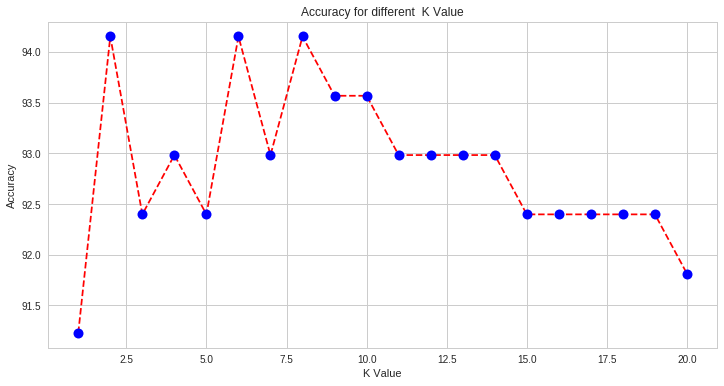

2
94.15204678362574


In [0]:
# Fitting KNN to the Training set

from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics 
knn = []
maxk=0
ptemp=0
for i in range(1,21):
            
    classifier = KNeighborsClassifier(n_neighbors=i)
    trained_model=classifier.fit(x_train,y_train)
    trained_model.fit(x_train,y_train )
    
    # Predicting the Test set results
    
    y_pred = classifier.predict(x_test)
    
    # Making the Confusion Matrix
    
    from sklearn.metrics import confusion_matrix
    
    cm_KNN = confusion_matrix(y_test, y_pred)
    print(cm_KNN)
   
    
    print("Accuracy score of test KNN")
    temp=metrics.accuracy_score(y_test, y_pred)*100
    print(temp)
    if(ptemp<temp):
      ptemp=temp
      maxk=i
    knn.append(metrics.accuracy_score(y_test, y_pred)*100)
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 21),knn, color='red', linestyle='dashed', marker='o',  
             markerfacecolor='blue', markersize=10)
plt.title('Accuracy for different  K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy') 
plt.show()
print(maxk)
print(ptemp)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics 

classifier = KNeighborsClassifier(n_neighbors=maxk)
trained_model=classifier.fit(x_train,y_train)
trained_model.fit(x_train,y_train )
    
# Predicting the Test set results
    
y_pred = classifier.predict(x_test)
    
# Making the Confusion Matrix
    
from sklearn.metrics import confusion_matrix
    
cm_KNN = confusion_matrix(y_test, y_pred)
print(cm_KNN)
   
    
print("Accuracy score of test KNN")
temp=metrics.accuracy_score(y_test, y_pred)*100
acc.append(temp)
model.append("KNN")
print(temp)

[[105   3]
 [  7  56]]
Accuracy score of test KNN
94.15204678362574


In [0]:
# Fitting SVM to the Training set

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)

classifier.fit(x_train,y_train)

    
# Predicting the Test set results
    
y_pred = classifier.predict(x_test)
    
# Making the Confusion Matrix
    
from sklearn.metrics import confusion_matrix
    
cm = confusion_matrix(y_test, y_pred)
print(cm)
   
    
print("Accuracy score of test svm")
temp=metrics.accuracy_score(y_test, y_pred)*100
acc.append(temp)
model.append("SVM-Linear")
print(temp)

[[105   3]
 [  2  61]]
Accuracy score of test svm
97.07602339181285


In [0]:
#Using SVC method of svm class to use Kernel SVM Algorithm

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)

classifier.fit(x_train, y_train)

# Predicting the Test set results
    
y_pred = classifier.predict(x_test)
    
# Making the Confusion Matrix
    
from sklearn.metrics import confusion_matrix
    
cm = confusion_matrix(y_test, y_pred)
print(cm)
   
    
print("Accuracy score of test svm kernel rbf")
temp=metrics.accuracy_score(y_test, y_pred)*100
acc.append(temp)
model.append("SVM-rbf")
print(temp)

[[100   8]
 [  5  58]]
Accuracy score of test svm kernel rbf
92.39766081871345


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

# Predicting the Test set results
    
y_pred = classifier.predict(x_test)
    
# Making the Confusion Matrix
    
from sklearn.metrics import confusion_matrix
    
cm = confusion_matrix(y_test, y_pred)
print(cm)
   
    
print("Accuracy score of test GaussianNB")
temp=metrics.accuracy_score(y_test, y_pred)*100
acc.append(temp)
model.append("Naive_bayes")
print(temp)

[[103   5]
 [  9  54]]
Accuracy score of test GaussianNB
91.81286549707602


In [0]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
# Predicting the Test set results
    
y_pred = classifier.predict(x_test)
    
# Making the Confusion Matrix
    
from sklearn.metrics import confusion_matrix
    
cm = confusion_matrix(y_test, y_pred)
print(cm)
   
    
print("Accuracy score of test DecisionTreeClassifier")
temp=metrics.accuracy_score(y_test, y_pred)*100
acc.append(temp)
model.append("DecisionTree")
print(temp)

[[101   7]
 [  3  60]]
Accuracy score of test DecisionTreeClassifier
94.15204678362574


In [0]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
# Predicting the Test set results
    
y_pred = classifier.predict(x_test)
    
# Making the Confusion Matrix
    
from sklearn.metrics import confusion_matrix
    
cm = confusion_matrix(y_test, y_pred)
print(cm)
   
    
print("Accuracy score of test Random Forest Classifier")
temp=metrics.accuracy_score(y_test, y_pred)*100
acc.append(temp)
model.append("Random Forest")
print(temp)

[[100   8]
 [  3  60]]
Accuracy score of test Random Forest Classifier
93.56725146198829


In [0]:
len(model)

7

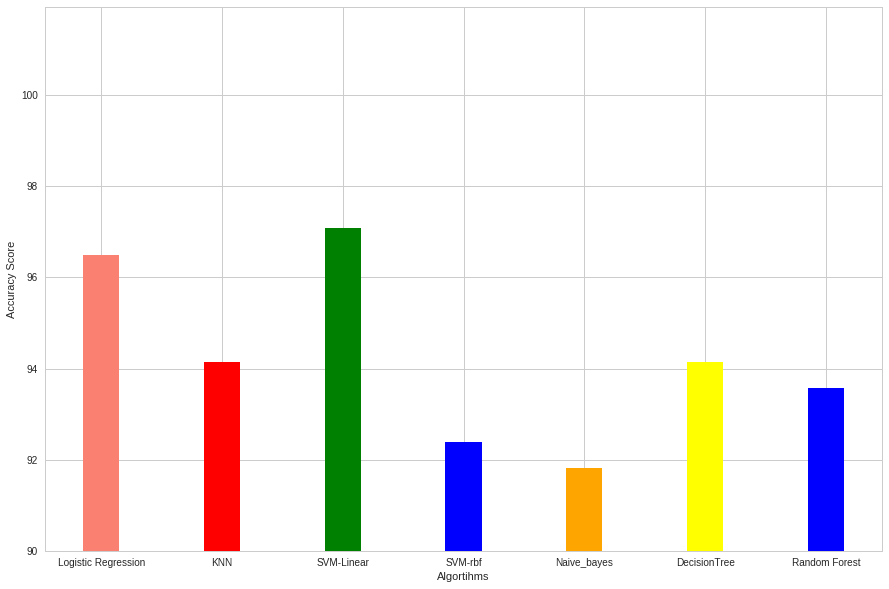

In [0]:
#lets plot the bar graph

plt.figure(figsize=(15,10))
plt.bar(model,acc,width=0.3,label='Accuracy',color=['salmon','r','g','b','orange','yellow','blue'])
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')
plt.gca().set_ylim(bottom=90)


plt.show()

In [0]:
acc.append(90.64)
acc.append(85.96)
model.append("En. K-means")
model.append("K-means")


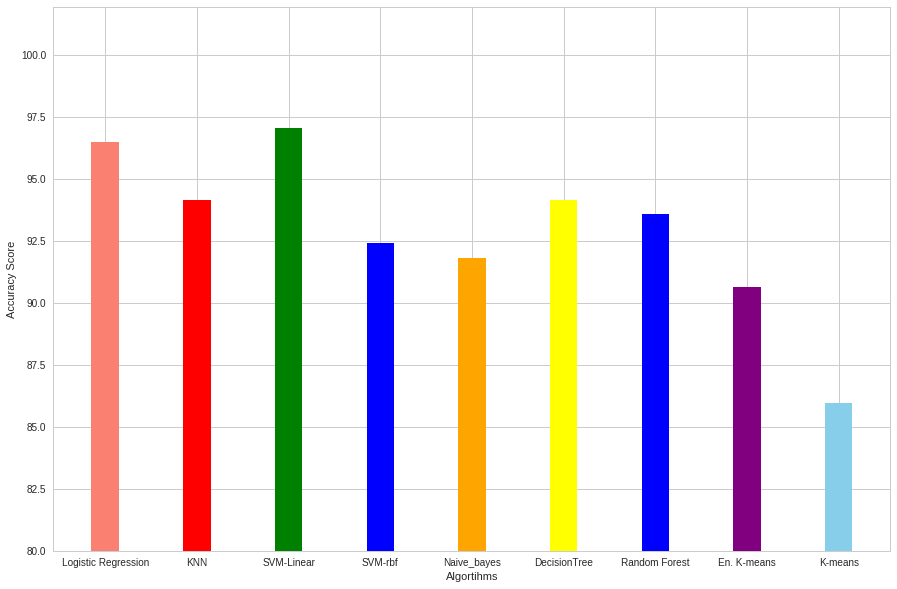

In [0]:
#lets plot the bar graph between supervised and unsupervised algos

plt.figure(figsize=(15,10))
plt.bar(model,acc,width=0.3,label='Accuracy',color=['salmon','r','g','b','orange','yellow','blue','purple','skyblue'])
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')
plt.gca().set_ylim(bottom=80)
#plt.margins(x=0.0001)


plt.show()